## (1) Importing required libraries;

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
import warnings

warnings.filterwarnings("ignore")

## (2) Loading the DataSet;

In [3]:
df = pd.read_csv("fake_or_real_news.csv")

In [4]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [5]:
df.shape

(6335, 4)

## (3) Data Cleaning using Pandas; 

In [6]:
df.head(21)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [7]:
df.tail(23)

,Unnamed: 0,title,text,label
6312,6516,ADHD NATION: How Big Pharma Created the ADHD E...,"By Kalee Brown\nWhile I was at university, man...",FAKE
6313,9636,Donald Trump claims the election will be 'rigg...,Email \nDonald Trump is again riling up his vo...,FAKE
6314,7398,REPORT: Dirty Reporter Blackmails Montel… Help...,"BREAKING: Trump Jumps in FL, Takes 4 Point Lea...",FAKE
6315,3717,Police Arrest Suspect In Charleston Church Sho...,"Police in Charleston, S.C., say a man they sus...",REAL
6316,5205,Donald Trump’s collapse was caused by one big ...,Silver of FiveThirtyEight.com has laid out fou...,REAL
6317,6696,FINA suspends Russian swimmer for 8 years over...,This post was originally published on this sit...,FAKE
6318,7991,BREAKING : Hillary Campaign Manager Deletes hi...,BREAKING : Hillary Campaign Manager Deletes hi...,FAKE
6319,1303,Why Ted Cruz Has the Most to Lose in New Hamps...,Ted Cruz took first prize in the Iowa caucuses...,REAL
6320,9051,“Nothing Good Can Come of This Election”–and T...,"Posted on November 4, 2016 by Charles Hugh Smi...",FAKE
6321,10200,List of Republicans opposing Trump | OffGuardian,"Charlie Baker , Massachusetts (2015–present)[3...",FAKE


In [8]:
df.nunique()

Unnamed: 0    6335
title         6256
text          6060
label            2
dtype: int64

In [9]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [10]:
df.shape

(6335, 4)

In [11]:
df[df.index==566]

,Unnamed: 0,title,text,label
566,7103,Hillary Clinton BETRAYED by Her Own Family: “W...,Hillary Clinton’s niece has revealed to Radar ...,FAKE


In [12]:
df[df.index.isin(range(21, 41))]

,Unnamed: 0,title,text,label
21,10348,Episode #160 – SUNDAY WIRE: ‘Hail to the Deplo...,"November 13, 2016 By 21wire Leave a Comment \n...",FAKE
22,778,Hillary Clinton Makes A Bipartisan Appeal on S...,Hillary Clinton told a Staten Island crowd tod...,REAL
23,3300,New Senate majority leader’s main goal for GOP...,Mitch McConnell has an unusual admonition for ...,REAL
24,6155,‘Inferno’ and the Overpopulation Myth,"Mises.org November 1, 2016 Inferno is a great ...",FAKE
25,636,Anti-Trump forces seek last-ditch delegate revolt,Washington (CNN) The faction of the GOP that i...,REAL
26,755,Sanders Trounces Clinton in W. Va. -- But Will...,"Meanwhile, Democrat Bernie Sanders picked up m...",REAL
27,626,Donald Trump Is Changing His Campaign Slogan t...,After a week of nonstop criticism from Democra...,REAL
28,691,Pure chaos: Donald Trump’s campaign management...,If you want a glimpse into a presidential cand...,REAL
29,5743,"Syrian War Report – November 1, 2016: Syrian M...","Syrian War Report – October 31, 2016: Al-Nusra...",FAKE
30,1787,GOP insiders: Carly crushed it,"On this day in 1973, J. Fred Buzhardt, a lawye...",REAL


In [13]:
df.size

25340

In [14]:
df.count()

Unnamed: 0    6335
title         6335
text          6335
label         6335
dtype: int64

In [15]:
df["text"].value_counts()

text
Killing Obama administration rules, dismantling Obamacare and pushing through tax reform are on the early to-do list.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [16]:
df.iloc[2334:4221]

,Unnamed: 0,title,text,label
2334,7578,Re: Schools All Over America Are Closing On El...,Schools All Over America Are Closing On Electi...,FAKE
2335,5657,Trump Mocks Biden's Dare To Take Him 'Behind t...,"\nIn the schoolyard of American politics, Rep...",FAKE
2336,4396,Obamacare Enrollees Anxiously Await Supreme Co...,"“I’ve got my six-month, regular cancer checkup...",REAL
2337,1615,Clinton’s Iowa dilemma,"Killing Obama administration rules, dismantlin...",REAL
2338,10147,Why Russia’s army can’t complete its moderniza...,"RBTH Daily , army , military , arms The Buk-M3...",FAKE
...,...,...,...,...
4216,2163,Who rules the world? America is no longer the ...,When we ask “who rules the world?” we commonly...,REAL
4217,5397,US Officials Try to Scare Voters With Terror T...,US Intelligence Sees Attacks Likely Ahead of T...,FAKE
4218,9435,Arianna Huffington Exposed Colluding With DNC ...,We Are Change \nAccording to the Code of Ethic...,FAKE
4219,5435,Liberal CNN Commentator Blames Republicans for...,"Washington Free Beacon October 27, 2016 \nCNN ...",FAKE


In [17]:
df.drop(6000)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [19]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


## (4) Data Visualization using Seaborn;

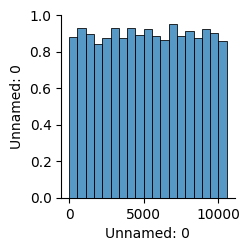

In [20]:
sns.pairplot(df)

## (5) Preprocess Text Data;

In [21]:
tokenizer = Tokenizer(num_words = 10000, oov_token = "<OOV>")

tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])

padded_sequences = pad_sequences(sequences, maxlen = 100, padding = 'post')

## (6) Split Data into Training & Testing;

In [22]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['text'])

In [23]:
y_train = y_train.map({'FAKE' : 0, 'REAL' : 1})

y_test = y_test.map({'FAKE' : 0, 'REAL' : 1})

## (7) Build & Train NLP Model using LSTM;

In [24]:
model = tf.keras.Sequential ([
        tf.keras.layers.Embedding(10000, 16, input_length = 100),
        tf.keras.layers.LSTM (64),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [25]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

model.fit(X_train,y_train, epochs=10, validation_data = (X_test, y_test))

Epoch 1/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.0000e+00 - loss: